# 010104.md파일 참조 

In [1]:
# 회귀모형 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

# 쓸데없는 알림 방지
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import itertools

#통계적 모형
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#머신러닝
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

In [2]:
rawData = pd.read_csv('C:/Users/scien/Videos/toyota/ToyotaCorolla.csv')

In [3]:
rawData.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
rawData[['Disel', 'Petrol']] = pd.get_dummies(rawData.Fuel_Type, drop_first=True)

In [5]:
rawData.drop(columns=['Id', 'Model', 'Fuel_Type'], inplace=True)

In [6]:
rawData

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Disel,Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,1,0,1,1,1,0,0,0,0,1
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,1,0,0,1,1,0,0,0,0,1
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,1,0,0,0,1,0,0,0,0,1
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,0,1,0,0,0,0,1


In [7]:
y = rawData[['Price']]
x = rawData.loc[:, 'Age_08_04':]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=1234)


In [8]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1005, 35) (1005, 1) (431, 35) (431, 1)


In [9]:
full_model = sm.OLS(y_train, x_train).fit()

In [10]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     313.8
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:10:03   Log-Likelihood:                -8417.6
No. Observations:                1005   AIC:                         1.690e+04
Df Residuals:                     971   BIC:                         1.707e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -121.1532      3.961    -30.588      0.000    -128.926    -113.380
Mfg_Month         -105.2356     10.423    -10.097      0.000    -125.689     -84.782
Mfg_Year            -1.4336      0.893     -1.605      0.109      -3.187       0.320
KM                  -0.0157      0.001    -11.823      0.000      -0.018      -0.013
HP                  12.2775      3.613      3.398      0.001       5.187      19.368
Met_Color           27.1183     77.008      0.352      0.725    -124.003     178.239
Automatic          179.9699    156.725      1.148      0.251    -127.588     487.528
cc                  -0.1120      0.076     -1.473      0.141      -0.261       0.037
Doors               21.4174     41.792      0.512      0.608     -60.595     103.430
Cylinders           -0.0405      0.002    -17.462      0.000      -0.045      -0.036
Gears               90.8221    199.155      0.456      0.648    -300.001     481.646
Quarterly_Tax       16.6228      1.919      8.661      0.000      12.856      20.389
Weight              14.9454      1.433     10.431      0.000      12.134      17.757
Mfr_Guarantee      271.2379     75.150      3.609      0.000     123.764     418.712
BOVAG_Guarantee    528.9799    129.522      4.084      0.000     274.804     783.155
Guarantee_Period    65.2547     13.722      4.756      0.000      38.327      92.182
ABS               -323.7378    129.841     -2.493      0.013    -578.539     -68.937
Airbag_1           325.7165    270.192      1.205      0.228    -204.512     855.945
Airbag_2           -34.3526    130.530     -0.263      0.792    -290.505     221.800
Airco              168.6876     91.105      1.852      0.064     -10.098     347.474
Automatic_airco   2353.5491    203.946     11.540      0.000    1953.324    2753.774
Boardcomputer     -326.4071    120.313     -2.713      0.007    -562.510     -90.304
CD_Player          166.7919    103.440      1.612      0.107     -36.200     369.783
Central_Lock      -182.5067    146.913     -1.242      0.214    -470.811     105.797
Powered_Windows    540.6911    148.356      3.645      0.000     249.556     831.826
Power_Steering    -306.6292    289.683     -1.058      0.290    -875.106     261.848
Radio             3034.8056   1111.450      2.730      0.006     853.685    5215.926
Mistlamps            9.5172    111.933      0.085      0.932    -210.142     229.176
Sport_Model        224.8163     91.952      2.445      0.015      44.368     405.264
Backseat_Divider  -360.0252    127.127     -2.832      0.005    -609.501    -110.549
Metallic_Rim       170.1097     98.300      1.731      0.084     -22.794     363.014
Radio_cassette   -3100.2489   1108.886     -2.796      0.005   -5276.339    -924.159
Tow_Bar           -164.3492     80.154     -2.050      0.041    -321.645      -7.054
Disel              433.

### Train의 경우 

In [11]:
full_model_predict = full_model.predict(x_train)

In [93]:
round(pd.concat([y_train, full_model_predict], axis=1),1) # 비교 

,Price,0
783,8990,8185.1
446,11950,11583.0
317,10950,11729.3
1164,8950,8864.1
739,9800,10274.8
...,...,...
1228,7750,7686.9
1077,6950,6379.3
1318,8500,8568.9
723,7950,8229.9


findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


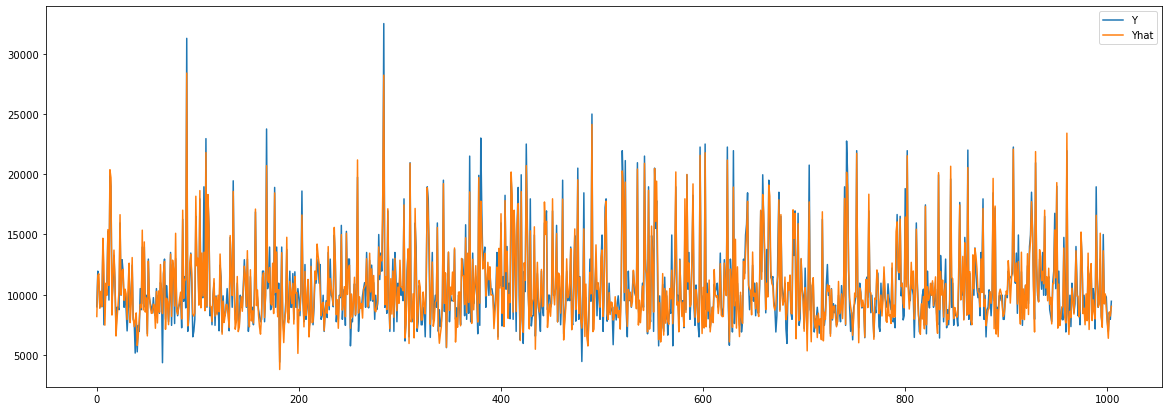

In [13]:
plt.figure(figsize=(20,7))
plt.plot(np.array(y_train), label='Y')
plt.plot(np.array(full_model_predict), label = 'Yhat')
plt.legend()
plt.show()

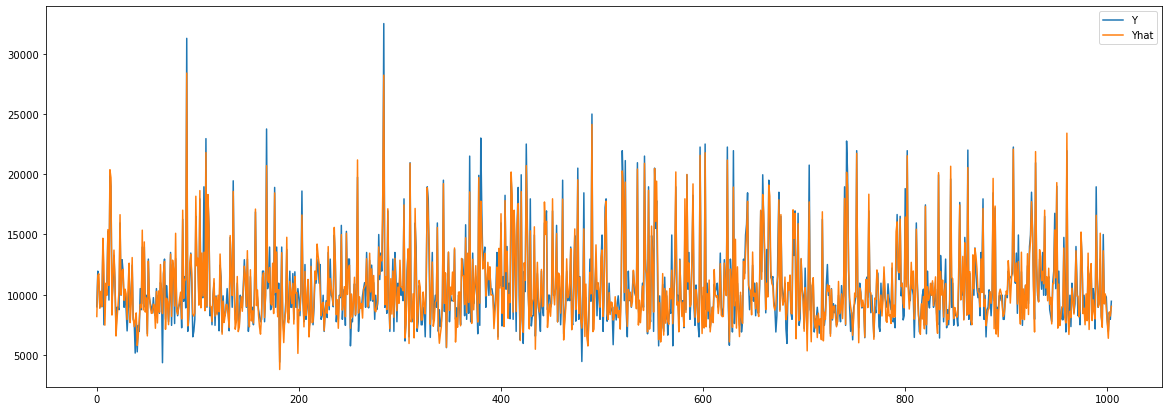

In [14]:
plt.figure(figsize=(20,7))
plt.plot(np.array(y_train), label='Y')
plt.plot(np.array(full_model_predict), label = 'Yhat')
plt.legend()
plt.show()

## test의 경우

In [15]:
full_model_predict2 = full_model.predict(x_test)

In [16]:
round(pd.concat([y_test, full_model_predict2], axis=1),1) # 비교 

,Price,0
630,7500,9271.3
454,11950,11643.4
148,19450,19956.7
110,31000,28250.0
1054,8750,6268.2
...,...,...
264,12000,12074.2
58,18950,19666.7
1274,9000,8629.5
423,11500,11470.3


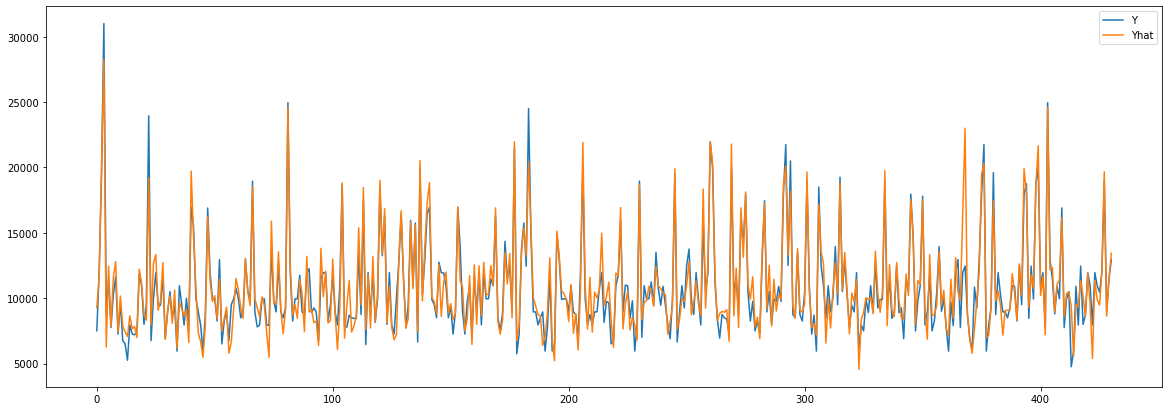

In [17]:
plt.figure(figsize=(20,7))
plt.plot(np.array(y_test), label='Y')
plt.plot(np.array(full_model_predict2), label = 'Yhat')
plt.legend()
plt.show()

## 적합하는지 살펴보자 
- mean absolute error

In [18]:
mean_absolute_error(y_true=y_train, y_pred=full_model_predict)

781.9615380362299

In [19]:
mean_absolute_error(y_true=y_test, y_pred=full_model_predict2)

893.8821805788624

In [20]:
mean_squared_error(y_true=y_train, y_pred=full_model_predict)

1103037.759839878

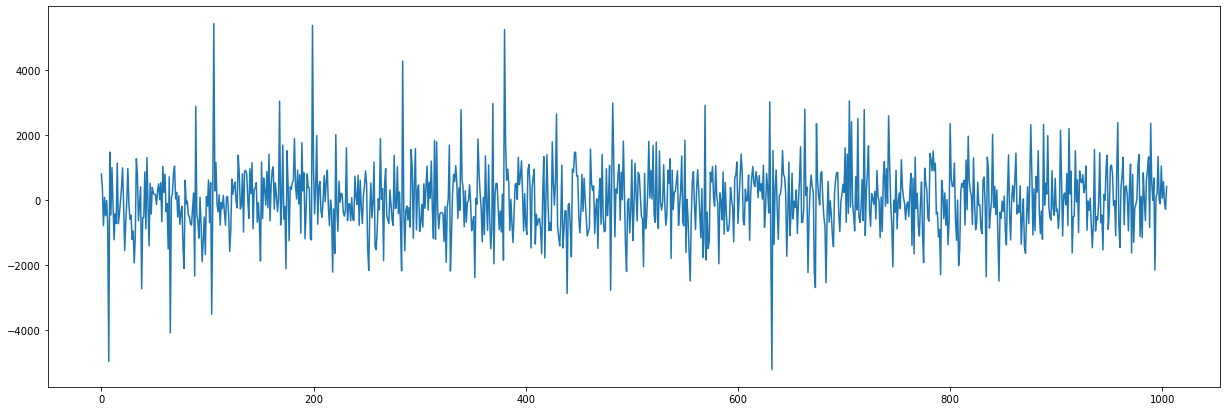

In [21]:
# 잔차 그리기 
plt.figure(figsize=(21,7))
plt.plot(np.array(full_model.resid))

## vif를 통한 다중공산성 확인

In [22]:
vif = pd.DataFrame()
# 변수가 높은 애들은 뽑아준다. 
rawDataVif1 = rawData.drop(columns=['Price',  'Radio', 'Radio_cassette', 'Mfg_Month', 'Mfg_Year', 'Age_08_04', 'Cylinders', 'Weight','Gears'
                                  ,'HP','Power_Steering','Petrol', 'Airbag_1', 'Quarterly_Tax','Doors'])
vif['VIF Factor'] = [variance_inflation_factor(rawDataVif1.values, i) for i in range(0, rawDataVif1.shape[1])]
vif['Feature'] = rawDataVif1.columns
vif

,VIF Factor,Feature
0,5.843224,KM
1,3.342152,Met_Color
2,1.102193,Automatic
3,11.934981,cc
4,2.008031,Mfr_Guarantee
5,10.623544,BOVAG_Guarantee
6,3.000783,Guarantee_Period
7,10.187191,ABS
8,10.507747,Airbag_2
9,3.477168,Airco


In [23]:
vif = pd.DataFrame()
# 변수가 높은 애들은 뽑아준다. 
rawDataVif2 = rawData.drop(columns=[
    'Price',  'Radio', 'Radio_cassette'
])
vif['VIF Factor'] = [variance_inflation_factor(rawDataVif2.values, i) for i in range(0, rawDataVif2.shape[1])]
vif['Feature'] = rawDataVif2.columns
vif

,VIF Factor,Feature
0,inf,Age_08_04
1,inf,Mfg_Month
2,inf,Mfg_Year
3,2.082475,KM
4,2.552619,HP
5,1.133766,Met_Color
6,1.115919,Automatic
7,1.256690,cc
8,1.348048,Doors
9,0.000000,Cylinders


### vif1

In [24]:
y = rawData[['Price']]
x = rawDataVif1

x_train2, x_test2, y_train2,  y_test2 = train_test_split(x,y,train_size=0.7, test_size=0.3, random_state=123)

In [25]:
vif1_model = sm.OLS(y_train2, x_train2).fit()
vif1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              1201.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                        0.00
Time:                        19:10:04   Log-Likelihood:                         -9152.9
No. Observations:                1005   AIC:                                  1.835e+04
Df Residuals:                     984   BIC:                                  1.845e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
KM                  -0.0171      0.002     -8.064      0.000      -0.021      -0.013
Met_Color          345.0857    155.278      2.222      0.026      40.371     649.800
Automatic          443.8198    305.081      1.455      0.146    -154.865    1042.505
cc                   1.5844      0.133     11.937      0.000       1.324       1.845
Mfr_Guarantee      508.5255    153.378      3.316      0.001     207.540     809.511
BOVAG_Guarantee   2718.5173    240.703     11.294      0.000    2246.166    3190.868
Guarantee_Period   487.6635     27.723     17.591      0.000     433.261     542.066
ABS               1309.3852    250.773      5.221      0.000     817.275    1801.496
Airbag_2           241.9151    272.078      0.889      0.374    -292.006     775.836
Airco             1008.1452    178.846      5.637      0.000     657.181    1359.109
Automatic_airco   6106.6631    370.607     16.477      0.000    5379.393    6833.933
Boardcomputer     1921.2637    205.964      9.328      0.000    1517.084    2325.444
CD_Player          699.0346    203.050      3.443      0.001     300.574    1097.496
Central_Lock       375.1733    286.851      1.308      0.191    -187.736     938.083
Powered_Windows   1031.2201    289.241      3.565      0.000     463.620    1598.820
Mistlamps        -1239.1648    220.038     -5.632      0.000   -1670.963    -807.367
Sport_Model        215.3693    176.889      1.218      0.224    -131.753     562.492
Backseat_Divider  1202.5058    250.180      4.807      0.000     711.558    1693.454
Metallic_Rim       367.2015    194.907      1.884      0.060     -15.280     749.683
Tow_Bar           -215.9960    160.236     -1.348      0.178    -530.440      98.448
Disel             1250.6633    259.785      4.814      0.000     740.867    1760.460
==============================================================================
Omnibus:                      167.084   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2812.688
Skew:                           0.068   Prob(JB):                         0.00
Kurtosis:                      11.195   Cond. No.                     4.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

(1005, 21) (431, 21) (1005, 1) (431, 1)


In [27]:
vif_model1 = sm.OLS(y_train2, x_train2).fit()
vif_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              1201.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                        0.00
Time:                        19:10:04   Log-Likelihood:                         -9152.9
No. Observations:                1005   AIC:                                  1.835e+04
Df Residuals:                     984   BIC:                                  1.845e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
KM                  -0.0171      0.002     -8.064      0.000      -0.021      -0.013
Met_Color          345.0857    155.278      2.222      0.026      40.371     649.800
Automatic          443.8198    305.081      1.455      0.146    -154.865    1042.505
cc                   1.5844      0.133     11.937      0.000       1.324       1.845
Mfr_Guarantee      508.5255    153.378      3.316      0.001     207.540     809.511
BOVAG_Guarantee   2718.5173    240.703     11.294      0.000    2246.166    3190.868
Guarantee_Period   487.6635     27.723     17.591      0.000     433.261     542.066
ABS               1309.3852    250.773      5.221      0.000     817.275    1801.496
Airbag_2           241.9151    272.078      0.889      0.374    -292.006     775.836
Airco             1008.1452    178.846      5.637      0.000     657.181    1359.109
Automatic_airco   6106.6631    370.607     16.477      0.000    5379.393    6833.933
Boardcomputer     1921.2637    205.964      9.328      0.000    1517.084    2325.444
CD_Player          699.0346    203.050      3.443      0.001     300.574    1097.496
Central_Lock       375.1733    286.851      1.308      0.191    -187.736     938.083
Powered_Windows   1031.2201    289.241      3.565      0.000     463.620    1598.820
Mistlamps        -1239.1648    220.038     -5.632      0.000   -1670.963    -807.367
Sport_Model        215.3693    176.889      1.218      0.224    -131.753     562.492
Backseat_Divider  1202.5058    250.180      4.807      0.000     711.558    1693.454
Metallic_Rim       367.2015    194.907      1.884      0.060     -15.280     749.683
Tow_Bar           -215.9960    160.236     -1.348      0.178    -530.440      98.448
Disel             1250.6633    259.785      4.814      0.000     740.867    1760.460
==============================================================================
Omnibus:                      167.084   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2812.688
Skew:                           0.068   Prob(JB):                         0.00
Kurtosis:                      11.195   Cond. No.                     4.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
vif1_model_train_predict = vif1_model.predict(x_train2)
vif1_model_test_predict = vif1_model.predict(x_test2)

In [29]:
pd.concat([y_train2, vif1_model_train_predict], axis=1)

,Price,0
584,10500,9110.778377
1140,6750,7558.382355
417,10950,11774.204367
317,10950,12487.623222
1065,6550,6495.111717
...,...,...
1041,10900,9373.361214
1122,7460,6578.593861
1346,7950,7957.815616
1406,8950,10969.603001


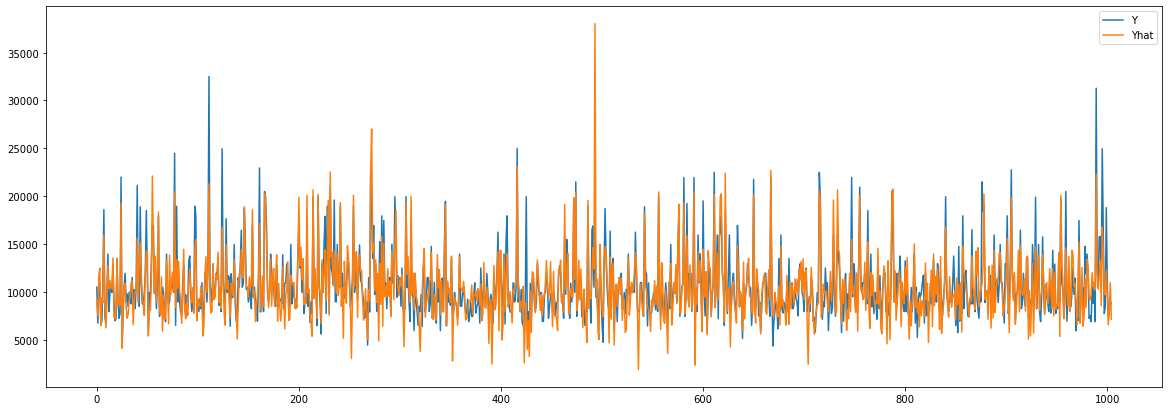

In [30]:
# DF 형식은 그래프가 고장나기 때문에 np.array로 바꿔줘야 한다 
plt.figure(figsize=(20,7))
plt.plot(np.array(y_train2), label='Y')
plt.plot(np.array(vif1_model_train_predict), label='Yhat')
plt.legend()
plt.show()

In [31]:
mean_absolute_error(y_true=y_train2, y_pred=vif1_model_train_predict)

1551.7532591059949

In [32]:
# full model
mean_absolute_error(y_true=y_train, y_pred=full_model_predict)

781.9615380362299

In [33]:
mean_squared_error(y_true=y_train2, y_pred=vif1_model_train_predict)

4765541.581116468

In [34]:
# full model 
mean_squared_error(y_true=y_train, y_pred=full_model_predict)

1103037.759839878

In [35]:
mean_squared_error(y_true=y_test2, y_pred=vif1_model_test_predict)

5184626.544990031

### VIF2

In [36]:
vif = pd.DataFrame()
# 변수가 높은 애들은 뽑아준다. 
rawDataVif2 = rawData.drop(columns=[
    'Price',  'Radio', 'Radio_cassette'
])
vif['VIF Factor'] = [variance_inflation_factor(rawDataVif2.values, i) for i in range(0, rawDataVif2.shape[1])]
vif['Feature'] = rawDataVif2.columns
vif

,VIF Factor,Feature
0,inf,Age_08_04
1,inf,Mfg_Month
2,inf,Mfg_Year
3,2.082475,KM
4,2.552619,HP
5,1.133766,Met_Color
6,1.115919,Automatic
7,1.256690,cc
8,1.348048,Doors
9,0.000000,Cylinders


In [37]:
y = rawData[['Price']]
x = rawDataVif2

x_train3, x_test3, y_train3,  y_test3 = train_test_split(x,y,train_size=0.7, test_size=0.3, random_state=123)

### vif 모델로 fit하기 

In [38]:
vif2_model = sm.OLS(y_train3, x_train3).fit()
vif2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     345.3
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:10:05   Log-Likelihood:                -8402.2
No. Observations:                1005   AIC:                         1.687e+04
Df Residuals:                     973   BIC:                         1.703e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -111.6042      3.907    -28.565      0.000    -119.271    -103.937
Mfg_Month          -89.9849     10.367     -8.680      0.000    -110.329     -69.641
Mfg_Year            -5.2502      1.020     -5.145      0.000      -7.253      -3.248
KM                  -0.0146      0.001    -11.473      0.000      -0.017      -0.012
HP                   3.8777      3.851      1.007      0.314      -3.679      11.435
Met_Color          -27.5440     75.653     -0.364      0.716    -176.005     120.917
Automatic           25.0270    155.989      0.160      0.873    -281.086     331.140
cc                  -0.1016      0.074     -1.369      0.171      -0.247       0.044
Doors             -137.8573     43.006     -3.206      0.001    -222.253     -53.461
Cylinders           -0.0440      0.002    -18.001      0.000      -0.049      -0.039
Gears              230.5478    188.562      1.223      0.222    -139.488     600.583
Quarterly_Tax       17.4505      1.914      9.119      0.000      13.695      21.206
Weight              22.1303      1.859     11.903      0.000      18.482      25.779
Mfr_Guarantee      305.6158     73.561      4.155      0.000     161.259     449.973
BOVAG_Guarantee    464.8741    133.896      3.472      0.001     202.116     727.632
Guarantee_Period    65.7383     15.685      4.191      0.000      34.958      96.519
ABS                -56.4196    131.900     -0.428      0.669    -315.261     202.422
Airbag_1           -15.5255    254.875     -0.061      0.951    -515.693     484.642
Airbag_2          -156.2429    134.584     -1.161      0.246    -420.352     107.866
Airco              185.3647     89.050      2.082      0.038      10.613     360.117
Automatic_airco   2222.2014    199.293     11.150      0.000    1831.108    2613.295
Boardcomputer     -310.2871    116.467     -2.664      0.008    -538.842     -81.732
CD_Player          252.5255     99.070      2.549      0.011      58.110     446.941
Central_Lock      -111.1843    137.572     -0.808      0.419    -381.157     158.788
Powered_Windows    405.8270    138.878      2.922      0.004     133.292     678.362
Power_Steering     -35.4177    281.851     -0.126      0.900    -588.523     517.687
Mistlamps          -39.5181    110.064     -0.359      0.720    -255.509     176.473
Sport_Model         75.4095     90.614      0.832      0.405    -102.412     253.231
Backseat_Divider  -220.4572    128.695     -1.713      0.087    -473.008      32.094
Metallic_Rim        92.9808     95.663      0.972      0.331     -94.749     280.711
Tow_Bar           -267.6276     79.021     -3.387      0.001    -422.699    -112.556
Disel             -512.8223    373.255     -1.374      0.170   -1245.300     219.655
Petrol            2579.7568    360.758      7.151      0.000    1871.804    3287.710
=======================

### 예측모델 만들기 

In [39]:
vif2_model_train_predict = vif2_model.predict(x_train3)
vif2_model_test_predict = vif2_model.predict(x_test3)

### 교육셋 + 예측 교육셋 합쳐 비교하고 그래프로 그리기   

In [40]:
pd.concat([y_train3, vif2_model_train_predict], axis=1)

,Price,0
584,10500,10610.396058
1140,6750,6329.442610
417,10950,11077.305111
317,10950,11796.926062
1065,6550,5769.161139
...,...,...
1041,10900,10383.578151
1122,7460,8272.304515
1346,7950,7805.424865
1406,8950,8740.516018


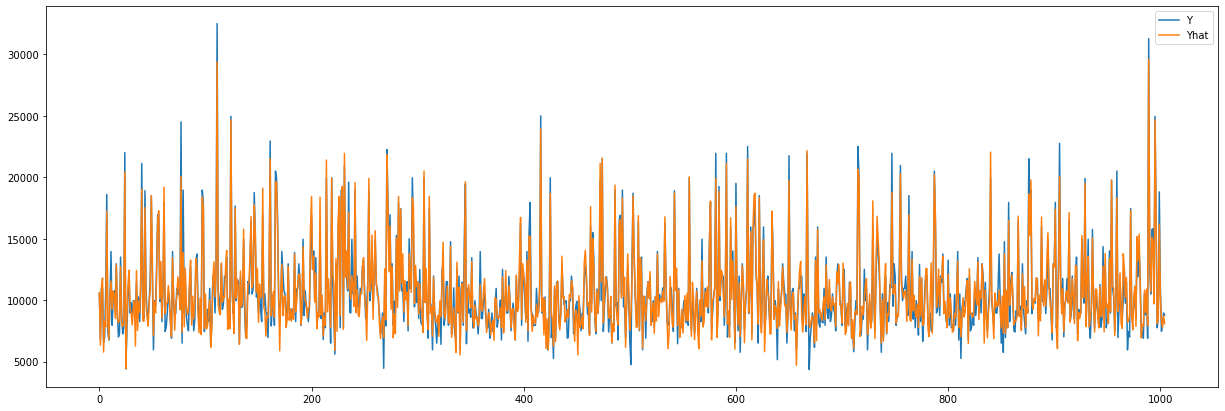

In [41]:
# 예측값과 비교하기 
plt.figure(figsize=(21,7))
plt.plot(np.array(y_train3), label='Y')
plt.plot(np.array(vif2_model_train_predict), label='Yhat')
plt.legend()
plt.show()

#### MSE 측정 

In [42]:
mean_squared_error(y_true=y_train3, y_pred=vif2_model_train_predict)

1069787.876146671

In [43]:
mean_squared_error(y_true=y_test3, y_pred=vif2_model_test_predict)

1867706.278463418

#### MAE 측정 

In [44]:
mean_absolute_error(y_true=y_train, y_pred=vif2_model_train_predict)

3508.687933047555

In [45]:
mean_absolute_error(y_true=y_test3, y_pred=vif2_model_test_predict)

873.1926574777999

### full 모델과 비슷한 에러값이 도출되었다. 

### 변수선택법 

In [46]:
# price를 제외한 전체 변수 
rawDataStep = rawData.iloc[:,1:]

In [47]:
# itertools.combinations 조합 함수 
for combo in itertools.combinations(rawDataStep.columns, 2):
    print(combo)

('Age_08_04', 'Mfg_Month')
('Age_08_04', 'Mfg_Year')
('Age_08_04', 'KM')
('Age_08_04', 'HP')
('Age_08_04', 'Met_Color')
('Age_08_04', 'Automatic')
('Age_08_04', 'cc')
('Age_08_04', 'Doors')
('Age_08_04', 'Cylinders')
('Age_08_04', 'Gears')
('Age_08_04', 'Quarterly_Tax')
('Age_08_04', 'Weight')
('Age_08_04', 'Mfr_Guarantee')
('Age_08_04', 'BOVAG_Guarantee')
('Age_08_04', 'Guarantee_Period')
('Age_08_04', 'ABS')
('Age_08_04', 'Airbag_1')
('Age_08_04', 'Airbag_2')
('Age_08_04', 'Airco')
('Age_08_04', 'Automatic_airco')
('Age_08_04', 'Boardcomputer')
('Age_08_04', 'CD_Player')
('Age_08_04', 'Central_Lock')
('Age_08_04', 'Powered_Windows')
('Age_08_04', 'Power_Steering')
('Age_08_04', 'Radio')
('Age_08_04', 'Mistlamps')
('Age_08_04', 'Sport_Model')
('Age_08_04', 'Backseat_Divider')
('Age_08_04', 'Metallic_Rim')
('Age_08_04', 'Radio_cassette')
('Age_08_04', 'Tow_Bar')
('Age_08_04', 'Disel')
('Age_08_04', 'Petrol')
('Mfg_Month', 'Mfg_Year')
('Mfg_Month', 'KM')
('Mfg_Month', 'HP')
('Mfg_Month'

In [48]:
# 변수 선택법을 만드는 함수 
def checkSubset(x,y,feature_set):
    model = sm.OLS(y, x[list(feature_set)]).fit()
    aic = model.aic
    return {'model' : model, 'AIC' : aic}

In [49]:
checkSubset(x=rawDataStep, y=rawData[['Price']], feature_set=rawDataStep.columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1d00b93ff40>,
 'AIC': 24244.24694228694}

In [50]:
# AIC 점수가 제일 낮은애는 누구인가? 
def getBest(x,y,k):
    
    results = []
    for combo in itertools.combinations(rawDataStep.columns, k):
        ret = checkSubset(x=rawDataStep, y=rawData.Price, feature_set=combo)
        results.append(ret)
        print(type(results))
        
    models = pd.DataFrame(results)
    bestModel = models.loc[models['AIC'].argmin()]
    return bestModel

In [51]:
ret = getBest(x=rawDataStep, y=rawData.Price, k=3)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [52]:
print(ret['model'].rsquared)
print(ret['model'].aic)
print(ret['model'].params)
ret['model'].summary()

0.9843947407369301
24917.12892196552
Age_08_04   -123.456313
KM            -0.023575
Weight        17.955284
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.013e+04
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                        0.00
Time:                        19:10:17   Log-Likelihood:                         -12456.
No. Observations:                1436   AIC:                                  2.492e+04
Df Residuals:                    1433   BIC:                                  2.493e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -123.4563      2.188    -56.436      0.000    -127.747    -119.165
KM            -0.0236      0.001    -20.311      0.000      -0.026      -0.021
Weight        17.9553      0.104    173.327      0.000      17.752      18.158
==============================================================================
Omnibus:                      179.817   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1652.385
Skew:                          -0.190   Prob(JB):                         0.00
Kurtosis:                       8.241   Cond. No.                     4.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
step_model_predict = ret.model.predict(rawDataStep[['Age_08_04', 'KM', 'Weight']])

In [54]:
mean_absolute_error(y_true=rawData['Price'], y_pred=step_model_predict)

1014.8583468442658

In [55]:
# full model
mean_absolute_error(y_true=y_train, y_pred=full_model_predict)

781.9615380362299

## 전진선택법 

In [56]:
# AIC 점수가 제일 낮은 값을 나타내는 녀석은?  
# argmin() 최소값의 위치 학인 
def forward(x,y):
    results = []
    for combo in itertools.combinations(rawDataStep.columns, k):
        ret = checkSubset(x=rawDataStep, y=rawData.Price, feature_set=combo)
        results.append(ret)
        
    models = pd.DataFrame(results)
    bestModel = models.loc[models['AIC'].argmin()]
    return bestModel

In [57]:
selected_columns = []

forward_columns = [ x for x in rawDataStep.columns if x not in selected_columns]

results = []
for col in forward_columns:
    ret = checkSubset(x=rawDataStep, y=rawData.Price, feature_set = [col])
    results.append(ret)
    
models = pd.DataFrame(results)
best_model = models.loc[models.AIC.argmin()]

In [58]:
print(best_model.model.params)
print(best_model.model.aic)

Weight    10.077955
dtype: float64
27385.244099108604


### 처음 선택된 것은 Weight

In [59]:
selected_columns = ['Weight']
forward_columns = [ x for x in rawDataStep.columns if x not in selected_columns]

In [60]:
results = []
for col in forward_columns:
    ret = checkSubset(x=rawDataStep, y=rawData.Price, feature_set= selected_columns + [col])
    results.append(ret)
    
models = pd.DataFrame(results)
best_model = models.loc[models.AIC.argmin()]

print(best_model.model.params)
print(best_model.model.aic)

Weight        17.649872
Age_08_04   -146.621258
dtype: float64
25278.441217903845


In [61]:
best_model.model.params.index

Index(['Weight', 'Age_08_04'], dtype='object')

### 두 번째로 선택된 것은 Age

In [62]:
selected_columns = ['Weight','Age_08_04']
forward_columns = [ x for x in rawDataStep.columns if x not in selected_columns]

In [63]:
results = []
for col in forward_columns:
    ret = checkSubset(x=rawDataStep, y=rawData.Price, feature_set= selected_columns + [col])
    results.append(ret)
    
models = pd.DataFrame(results)
best_model = models.loc[models.AIC.argmin()]

print(best_model.model.params)
print(best_model.model.aic)

Weight        17.955284
Age_08_04   -123.456313
KM            -0.023575
dtype: float64
24917.12892196552


### 세 번째로 선택된 것은 KM

- 이후 선택된 값을 selected_columns에 추가하면 된다. 
- 지속적으로 aic가 조금씩 줄어들고 있다 

### 이런 것은 일반적으로 자동으로 만들 수 있다. 이해를 위해서 손수 만들었을 뿐 

In [64]:
def forward(x,y):
    
    selected_columns = []
    
    for i in range(0, x.shape[1]):
        results = []
        forward_columns = [col for col in x.columns if col not in selected_columns]
    
        for col in forward_columns:
            ret = checkSubset(x=x, y=y, feature_set=selected_columns + [col])
            results.append(ret)

        models = pd.DataFrame(results)
        best_model = models.loc[models.AIC.argmin()]
        
        if  i > 0 : 
            if best_model.model.aic > before_model.model.aic: break
            else:
                before_model = best_model
                
        else: 
            #before_aic = best_model.model.aic 
            before_model = best_model
            
        selected_columns = list(best_model.model.params.index)
        #print('selected columns: ', selected_columns, "AIC: ", best_model.model.aic)
        
    return before_model

In [65]:
ret = forward(x=rawDataStep, y=rawData.Price)

In [66]:
print(ret.model.params)
print('')
print(ret)
print('')
print('정확도 : ', ret.model.rsquared )

Weight                12.170597
Age_08_04           -117.361662
KM                    -0.016204
Automatic_airco     2395.788883
HP                    18.389438
Mfg_Month            -94.283662
Powered_Windows      337.167908
BOVAG_Guarantee      507.337062
Guarantee_Period      67.913196
Quarterly_Tax         14.444525
Petrol              2255.275516
Sport_Model          299.777854
ABS                 -279.438038
Mfr_Guarantee        226.456545
Boardcomputer       -252.955794
Tow_Bar             -204.636463
Airco                187.850765
Backseat_Divider    -293.515306
Metallic_Rim         198.858782
Disel                947.256643
CD_Player            220.949248
Automatic            296.306070
cc                    -0.109118
dtype: float64

model    <statsmodels.regression.linear_model.Regressio...
AIC                                                24227.9
Name: 2, dtype: object

정확도 :  0.9906083407278317


In [67]:
step_forward_model = forward(x=rawDataStep, y=rawData.Price)

In [68]:
print(step_forward_model.model.rsquared)

0.9906083407278317


In [69]:
step_forward_model_predict = step_forward_model.model.predict(rawDataStep[list(step_forward_model.model.params.index)])

In [70]:
mean_absolute_error(y_true=rawData['Price'], y_pred=step_forward_model_predict)

809.313794054684

In [71]:
mean_squared_error(y_true=rawData['Price'], y_pred=step_forward_model_predict)

1204915.1922484215

ㄱ

ㄱ

## 후진제거법 

In [72]:
selected_columns = list(rawDataStep.columns)

In [73]:
len(selected_columns)

35

In [74]:
# 35개의 변수로 34개의 조합을 만든다 
# ret은 변수선택법 
results = []
for combo in itertools.combinations(selected_columns, len(selected_columns)-1):
    backward_columns = list(combo)
    ret = checkSubset(x=rawDataStep, y=rawData.Price, feature_set=backward_columns)
    results.append(ret)
    
models = pd.DataFrame(results)
best_model = models.loc[models['AIC'].argmin()]
print(best_model)

model    <statsmodels.regression.linear_model.Regressio...
AIC                                                24242.2
Name: 29, dtype: object


In [75]:
print(len(best_model.model.params))
print(len(selected_columns))

34
35


In [76]:
best_model.model.params.index

Index(['Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar', 'Disel', 'Petrol'],
      dtype='object')

In [77]:
selected_columns = list(best_model.model.params.index)
results = []

for combo in itertools.combinations(selected_columns, len(selected_columns)-1):
    backward_columns = list(combo)
    ret = checkSubset(x=rawDataStep, y=rawData.Price, feature_set=backward_columns)
    results.append(ret)
    
models = pd.DataFrame(results)
best_model = models.loc[models['AIC'].argmin()]
print(best_model)

model    <statsmodels.regression.linear_model.Regressio...
AIC                                                24240.3
Name: 9, dtype: object


In [78]:
print(len(best_model.model.params))
print(len(selected_columns))

33
34


In [79]:
best_model.model.params.index

Index(['Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar', 'Disel', 'Petrol'],
      dtype='object')

## 실제로 만들어보기 

In [80]:
# 병신같은 풀이 
def backward(x,y):
    selected_columns = []
    
    for i in range(0, x.shape[1]):
        result = []
        backward_columns = [col for col in x.columns if col in selected_columns ]
        for col in backward_columns:
            ret = checkSubset(x=rawDataStep, y=rawData.Price, feature_set=backward_columns)
            results.append(ret)
            
        if  i > 0 : 
            if best_model.model.aic > before_model.model.aic: break
            else:
                before_model = best_model
                
        else: 
            #before_aic = best_model.model.aic 
            before_model = best_model
            
        selected_columns = list(best_model.model.params.index)
        #print('selected columns: ', selected_columns, "AIC: ", best_model.model.aic)
        
    return before_model

In [81]:
# 완벽 풀이 
def backward(x,y):
    # 전체 컬럼을 가지고 시작한다. index(행)가 아닌 columns(열)로 잡아준다
    selected_columns = list(x.columns)
    
    # 일단 반복은 똑같이 진행한다.
    for i in range(0, x.shape[1]):
        results = []

        # 하나씩 제거 
        for combo in itertools.combinations(selected_columns, len(selected_columns)-1):
            backward_columns = list(combo)
            ret = checkSubset(x=x, y=y, feature_set=backward_columns)
            results.append(ret)
        
        models = pd.DataFrame(results)
        best_model = models.loc[models['AIC'].argmin()]
            
        if  i > 0 : 
            if best_model.model.aic > before_model.model.aic: break
            else:
                before_model = best_model
                
        else: 
            #before_aic = best_model.model.aic 
            before_model = best_model
            
        selected_columns = list(best_model.model.params.index)
        
    return before_model 

In [82]:
step_backward_model = backward(x=rawDataStep, y=rawData.Price)

In [83]:
step_backward_model.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              6480.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                        0.00
Time:                        19:10:21   Log-Likelihood:                         -12091.
No. Observations:                1436   AIC:                                  2.423e+04
Df Residuals:                    1413   BIC:                                  2.435e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -117.3617      3.072    -38.204      0.000    -123.388    -111.336
Mfg_Month          -94.2837      8.872    -10.628      0.000    -111.687     -76.881
KM                  -0.0162      0.001    -14.590      0.000      -0.018      -0.014
HP                  18.3894      2.936      6.262      0.000      12.629      24.150
Automatic          296.3061    130.956      2.263      0.024      39.416     553.196
cc                  -0.1091      0.077     -1.419      0.156      -0.260       0.042
Quarterly_Tax       14.4445      1.575      9.172      0.000      11.355      17.534
Weight              12.1706      0.472     25.763      0.000      11.244      13.097
Mfr_Guarantee      226.4565     64.207      3.527      0.000     100.505     352.408
BOVAG_Guarantee    507.3371    109.995      4.612      0.000     291.566     723.108
Guarantee_Period    67.9132     11.736      5.787      0.000      44.891      90.935
ABS               -279.4380     85.191     -3.280      0.001    -446.552    -112.324
Airco              187.8508     75.635      2.484      0.013      39.482     336.220
Automatic_airco   2395.7889    154.895     15.467      0.000    2091.941    2699.637
Boardcomputer     -252.9558    101.130     -2.501      0.012    -451.337     -54.575
CD_Player          220.9492     85.215      2.593      0.010      53.787     388.111
Powered_Windows    337.1679     73.299      4.600      0.000     193.380     480.955
Sport_Model        299.7779     72.967      4.108      0.000     156.643     442.913
Backseat_Divider  -293.5153    102.949     -2.851      0.004    -495.465     -91.565
Metallic_Rim       198.8588     78.687      2.527      0.012      44.503     353.214
Tow_Bar           -204.6365     67.622     -3.026      0.003    -337.286     -71.987
Disel              947.2566    316.523      2.993      0.003     326.351    1568.162
Petrol            2255.2755    307.027      7.346      0.000    1652.997    2857.554
==============================================================================
Omnibus:                      160.577   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.684
Skew:                          -0.012   Prob(JB):                    1.04e-302
Kurtosis:                       7.821   Cond. No.                     1.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
print(step_backward_model.model.rsquared)

0.9906083407278317


## `전진`과 `후진` 비교

In [86]:
len(step_forward_model.model.params)

23

In [88]:
len(step_backward_model.model.params)

23

In [89]:
step_forward_model.model.rsquared

0.9906083407278317

In [90]:
print(step_backward_model.model.rsquared)

0.9906083407278317
